In [11]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Setup
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
os.makedirs('figures', exist_ok=True)

print("=" * 70)
print("  SCRIPT 01: SIMULATION OVERVIEW")
print("=" * 70)
print()

# Load in the data

df = pd.read_csv("data/processed_dataset.csv")

  SCRIPT 01: SIMULATION OVERVIEW



In [13]:
# Dataset Overview

df.describe(include="all")

,id,timestamp,style,topic,sentiment,load_factor,agents,capacity,text,style_id,topic_id,sentiment_id
count,3000,3000,3000,3000,3000,3000.000000,3000.000000,3000.000000,3000,3000.000000,3000.000000,3000.000000
unique,3000,365,5,5,4,NaN,NaN,NaN,3000,NaN,NaN,NaN
top,c322f693-3c09-4912-aa4c-68831b8c60aa,2024-01-04,formal_report,resource_allocation,cautious,NaN,NaN,NaN,an analysis was conducted to determine that in...,NaN,NaN,NaN
freq,1,18,632,629,803,NaN,NaN,NaN,1,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,0.287763,255.241333,173.416000,NaN,1.974667,2.027333,1.460000
std,NaN,NaN,NaN,NaN,NaN,0.157887,143.126341,72.678647,NaN,1.405709,1.408278,1.126124
min,NaN,NaN,NaN,NaN,NaN,0.010000,10.000000,50.000000,NaN,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,0.170000,130.000000,109.000000,NaN,1.000000,1.000000,0.000000
50%,NaN,NaN,NaN,NaN,NaN,0.270000,253.000000,171.000000,NaN,2.000000,2.000000,1.000000
75%,NaN,NaN,NaN,NaN,NaN,0.390000,382.000000,235.000000,NaN,3.000000,3.000000,2.000000


In [15]:
# Risk Distribution

df["high_risk"] = (df["load_factor"] > 0.7).astype(int)
df["high_risk"].value_counts(normalize=True)

high_risk
0    0.991667
1    0.008333
Name: proportion, dtype: float64

In [17]:
# Example Reports

df.sample(5)[["text", "load_factor"]]

,text,load_factor
1333,it looks like that environmental pressure appe...,0.46
2730,an analysis was conducted to determine that sy...,0.35
2923,one possible explanation is that infrastructur...,0.19
2900,it looks like that environmental pressure cann...,0.07
2009,warning: that resource allocation appears to i...,0.08


Visualizing Ground Truth Dynamics...
----------------------------------------------------------------------
✅ Saved: figures/01_ground_truth_dynamics.png


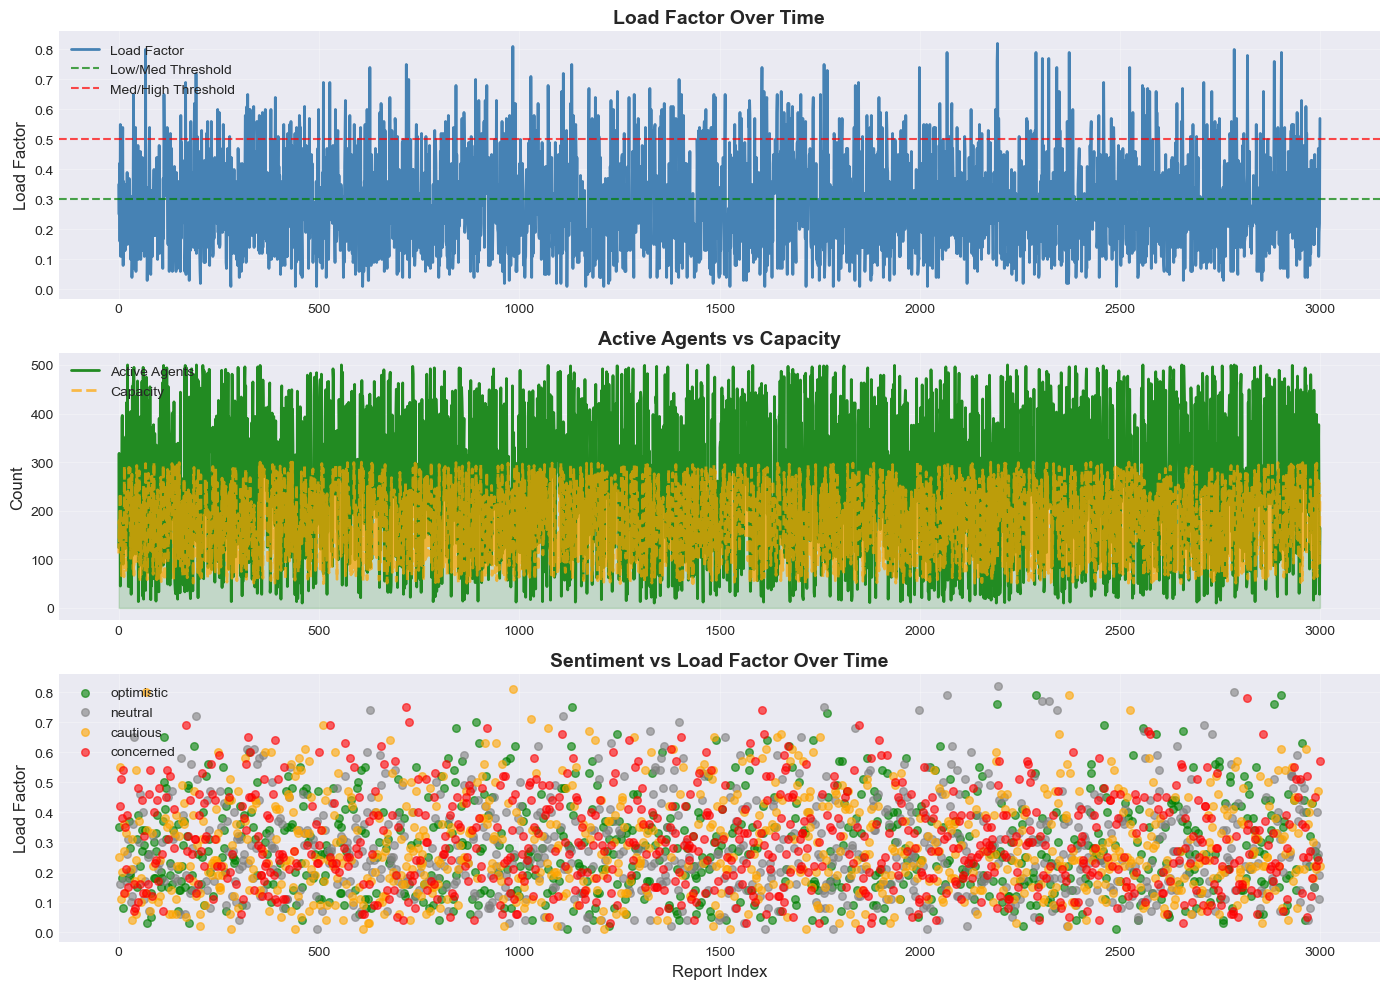


Analyzing Risk Categories...
----------------------------------------------------------------------
✅ Saved: figures/01_risk_distribution.png


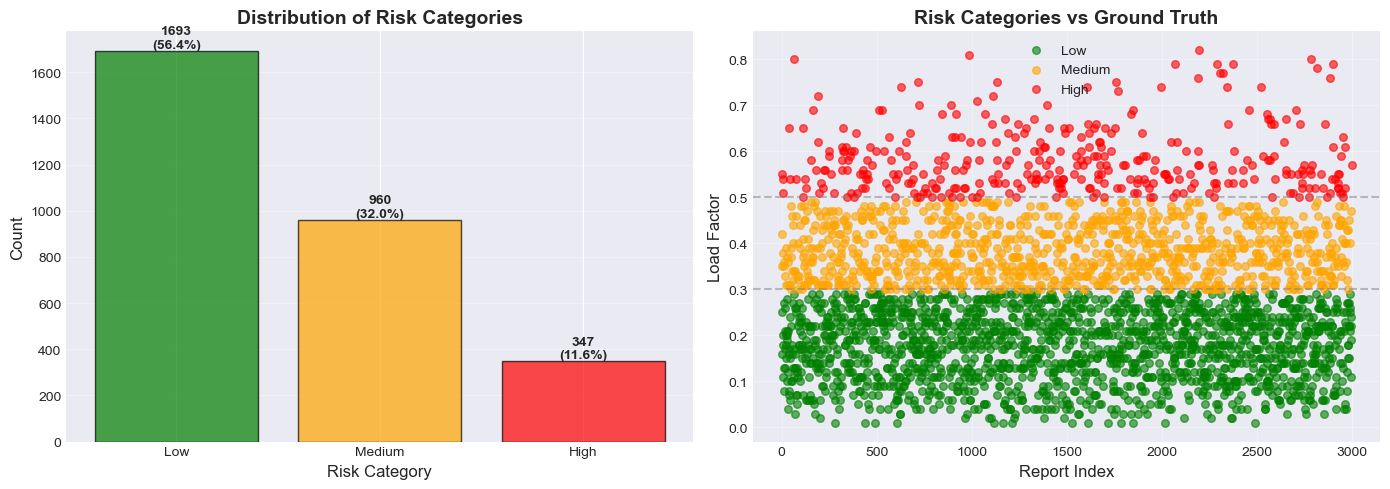


Risk category statistics:
                count      mean       std   min     25%   50%   75%   max
risk_category                                                            
High            347.0  0.582133  0.071488  0.50  0.5300  0.56  0.62  0.82
Low            1693.0  0.173331  0.072984  0.01  0.1200  0.18  0.23  0.29
Medium          960.0  0.383167  0.055960  0.30  0.3375  0.38  0.43  0.49

Analyzing Sentiment Distribution...
----------------------------------------------------------------------


C:\Users\rfull\AppData\Local\Temp\ipykernel_13652\982043657.py:132: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = axes[1].boxplot([df[df['sentiment']==s]['load_factor'].values


✅ Saved: figures/01_sentiment_analysis.png


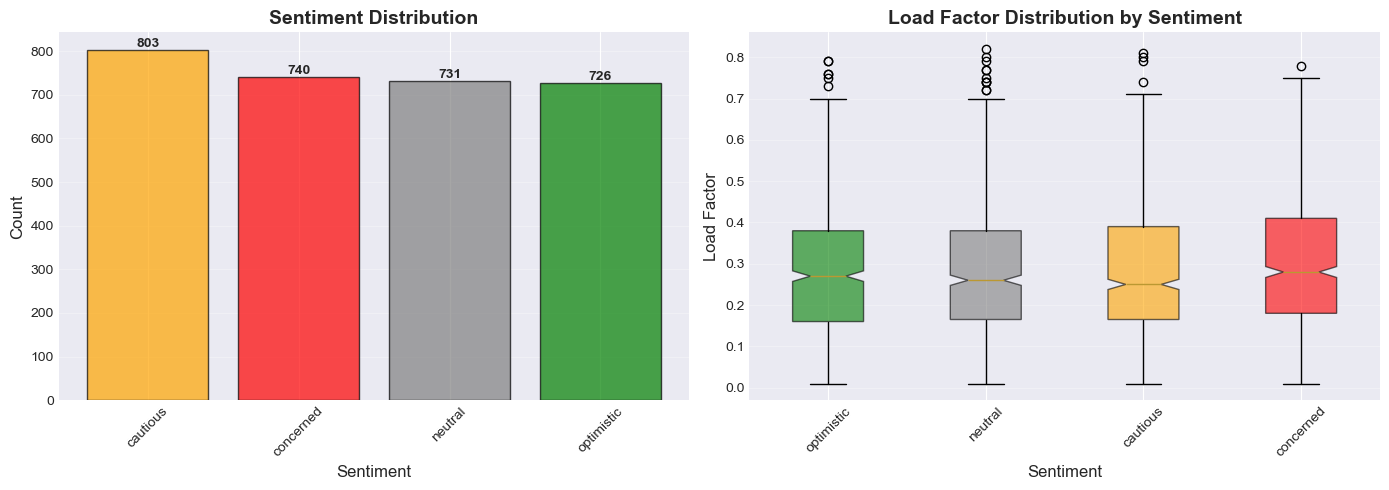


Sentiment by load factor statistics:
  optimistic  : mean=0.284, std=0.158, n=726
  cautious    : mean=0.283, std=0.158, n=803
  concerned   : mean=0.299, std=0.156, n=740
  neutral     : mean=0.284, std=0.159, n=731

  CONCLUSIONS

From this ground truth analysis:

1. Load Factor Dynamics
   - Range: 0.010 to 0.820
   - Mean: 0.288
   - Std Dev: 0.158

2. Risk Categories
   - Low   : 1693 reports ( 56.4%)
   - Medium: 960 reports ( 32.0%)
   - High  : 347 reports ( 11.6%)

3. Sentiment Distribution
   - cautious    : 803 reports ( 26.8%), avg load=0.283
   - concerned   : 740 reports ( 24.7%), avg load=0.299
   - neutral     : 731 reports ( 24.4%), avg load=0.284
   - optimistic  : 726 reports ( 24.2%), avg load=0.284

Next: Script 02 will analyze language patterns in these reports



In [19]:
# Create risk categories
def categorize_risk(load_factor):
    if load_factor < 0.3:
        return 'Low'
    elif load_factor < 0.5:
        return 'Medium'
    else:
        return 'High'

df['risk_category'] = df['load_factor'].apply(categorize_risk)

# ============================================================================
# GROUND TRUTH DYNAMICS
# ============================================================================
print("Visualizing Ground Truth Dynamics...")
print("-" * 70)

fig, axes = plt.subplots(3, 1, figsize=(14, 10))

# Load factor over time
axes[0].plot(df.index, df['load_factor'], label='Load Factor', color='steelblue', linewidth=2)
axes[0].axhline(0.3, color='green', linestyle='--', label='Low/Med Threshold', alpha=0.7)
axes[0].axhline(0.5, color='red', linestyle='--', label='Med/High Threshold', alpha=0.7)
axes[0].set_ylabel('Load Factor', fontsize=12)
axes[0].set_title('Load Factor Over Time', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Agents over time
axes[1].plot(df.index, df['agents'], label='Active Agents', color='forestgreen', linewidth=2)
axes[1].plot(df.index, df['capacity'], label='Capacity', color='orange', 
            linestyle='--', linewidth=2, alpha=0.7)
axes[1].set_ylabel('Count', fontsize=12)
axes[1].set_title('Active Agents vs Capacity', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)
axes[1].fill_between(df.index, 0, df['agents'], alpha=0.2, color='forestgreen')

# Sentiment over time
sentiment_colors = {'optimistic': 'green', 'neutral': 'gray', 
                   'cautious': 'orange', 'concerned': 'red'}
for sentiment, color in sentiment_colors.items():
    mask = df['sentiment'] == sentiment
    axes[2].scatter(df[mask].index, df[mask]['load_factor'], 
                   label=sentiment, alpha=0.6, s=30, color=color)
axes[2].set_xlabel('Report Index', fontsize=12)
axes[2].set_ylabel('Load Factor', fontsize=12)
axes[2].set_title('Sentiment vs Load Factor Over Time', fontsize=14, fontweight='bold')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('figures/01_ground_truth_dynamics.png', dpi=300, bbox_inches='tight')
print("✅ Saved: figures/01_ground_truth_dynamics.png")
plt.show()

# ============================================================================
# RISK CATEGORY DISTRIBUTION
# ============================================================================
print()
print("Analyzing Risk Categories...")
print("-" * 70)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
risk_counts = df['risk_category'].value_counts()
colors_risk = {'Low': 'green', 'Medium': 'orange', 'High': 'red'}
colors = [colors_risk[cat] for cat in risk_counts.index]
axes[0].bar(risk_counts.index, risk_counts.values, color=colors, alpha=0.7, edgecolor='black')
axes[0].set_xlabel('Risk Category', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].set_title('Distribution of Risk Categories', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3, axis='y')

# Add percentages
for i, (cat, count) in enumerate(risk_counts.items()):
    pct = count / len(df) * 100
    axes[0].text(i, count, f'{count}\n({pct:.1f}%)', 
                ha='center', va='bottom', fontweight='bold', fontsize=10)

# Risk over time with categories
for risk_cat in ['Low', 'Medium', 'High']:
    mask = df['risk_category'] == risk_cat
    axes[1].scatter(df[mask].index, df[mask]['load_factor'], 
                   label=risk_cat, alpha=0.6, s=30, color=colors_risk[risk_cat])
axes[1].axhline(0.3, color='gray', linestyle='--', alpha=0.5)
axes[1].axhline(0.5, color='gray', linestyle='--', alpha=0.5)
axes[1].set_xlabel('Report Index', fontsize=12)
axes[1].set_ylabel('Load Factor', fontsize=12)
axes[1].set_title('Risk Categories vs Ground Truth', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('figures/01_risk_distribution.png', dpi=300, bbox_inches='tight')
print("✅ Saved: figures/01_risk_distribution.png")
plt.show()

print()
print("Risk category statistics:")
print(df.groupby('risk_category')['load_factor'].describe())
print()

# ============================================================================
# SENTIMENT ANALYSIS
# ============================================================================
print("Analyzing Sentiment Distribution...")
print("-" * 70)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Sentiment distribution
sentiment_counts = df['sentiment'].value_counts()
colors_sent = [sentiment_colors.get(s, 'blue') for s in sentiment_counts.index]
axes[0].bar(sentiment_counts.index, sentiment_counts.values, 
           color=colors_sent, alpha=0.7, edgecolor='black')
axes[0].set_xlabel('Sentiment', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].set_title('Sentiment Distribution', fontsize=14, fontweight='bold')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True, alpha=0.3, axis='y')

# Add counts
for i, (sent, count) in enumerate(sentiment_counts.items()):
    axes[0].text(i, count, str(count), ha='center', va='bottom', 
                fontweight='bold', fontsize=10)

# Box plot: sentiment vs load factor
sentiment_order = ['optimistic', 'neutral', 'cautious', 'concerned']
box_colors = [sentiment_colors[s] for s in sentiment_order if s in df['sentiment'].values]
bp = axes[1].boxplot([df[df['sentiment']==s]['load_factor'].values 
                      for s in sentiment_order if s in df['sentiment'].values],
                     labels=[s for s in sentiment_order if s in df['sentiment'].values],
                     patch_artist=True, notch=True)

for patch, color in zip(bp['boxes'], box_colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.6)

axes[1].set_xlabel('Sentiment', fontsize=12)
axes[1].set_ylabel('Load Factor', fontsize=12)
axes[1].set_title('Load Factor Distribution by Sentiment', fontsize=14, fontweight='bold')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('figures/01_sentiment_analysis.png', dpi=300, bbox_inches='tight')
print("✅ Saved: figures/01_sentiment_analysis.png")
plt.show()

print()
print("Sentiment by load factor statistics:")
for sentiment in df['sentiment'].unique():
    mask = df['sentiment'] == sentiment
    print(f"  {sentiment:12s}: mean={df[mask]['load_factor'].mean():.3f}, "
          f"std={df[mask]['load_factor'].std():.3f}, n={mask.sum()}")
print()

# ============================================================================
# CONCLUSIONS
# ============================================================================
print("=" * 70)
print("  CONCLUSIONS")
print("=" * 70)
print()
print("From this ground truth analysis:")
print()
print("1. Load Factor Dynamics")
print(f"   - Range: {df['load_factor'].min():.3f} to {df['load_factor'].max():.3f}")
print(f"   - Mean: {df['load_factor'].mean():.3f}")
print(f"   - Std Dev: {df['load_factor'].std():.3f}")
print()
print("2. Risk Categories")
for cat in ['Low', 'Medium', 'High']:
    count = (df['risk_category'] == cat).sum()
    pct = count / len(df) * 100
    print(f"   - {cat:6s}: {count:3d} reports ({pct:5.1f}%)")
print()
print("3. Sentiment Distribution")
for sent in df['sentiment'].value_counts().index:
    count = (df['sentiment'] == sent).sum()
    pct = count / len(df) * 100
    avg_load = df[df['sentiment']==sent]['load_factor'].mean()
    print(f"   - {sent:12s}: {count:3d} reports ({pct:5.1f}%), avg load={avg_load:.3f}")
print()
print("Next: Script 02 will analyze language patterns in these reports")
print()